In [1]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
from scipy.constants import lambda2nu, nu2lambda, c
import os
import imp
import matplotlib.pyplot as plt
import sys

#windows path
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\') 
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')

#linux path
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))

## engine
#/opt/lumerical/v221/bin

In [5]:
inter = lumapi.INTERCONNECT(filename= 'hybrid.icp')

In [3]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

In [4]:
R1 = inter.getresult('ONA_1','input 1/mode 1/transmission')
R2 = inter.getresult('ONA_1','input 2/mode 1/transmission')
R3 = inter.getresult('ONA_1','input 3/mode 1/transmission')
R4 = inter.getresult('ONA_1','input 4/mode 1/transmission')
R5 = inter.getresult('ONA_1','input 5/mode 1/transmission')
R6 = inter.getresult('ONA_1','input 6/mode 1/transmission')
T1 = np.abs(R1['mode 1 transmission'])**2
T2 = np.abs(R2['mode 1 transmission'])**2
T3 = np.abs(R3['mode 1 transmission'])**2
T4 = np.abs(R4['mode 1 transmission'])**2
T5 = np.abs(R5['mode 1 transmission'])**2
T6 = np.abs(R6['mode 1 transmission'])**2
lambd = R2['wavelength']
signalport = -10*np.log10(T1 + T2 + T3 + T4 + T5 + T6)

LumApiError: "Can not find result 'input 1/mode 1/transmission' in the result provider 'ONA_1'"

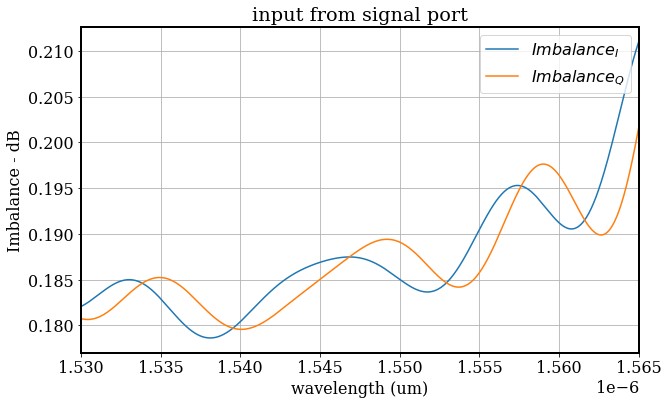

In [77]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
imbalance_I_sp = abs(10*np.log10(T2) - 10*np.log10(T3))
imbalance_Q_sp = abs(10*np.log10(T6) - 10*np.log10(T5))
plt.plot(lambd, imbalance_I_sp, label = '$Imbalance_I$')
plt.plot(lambd, imbalance_Q_sp, label = '$Imbalance_Q$')
plt.xlim([1530e-9, 1565e-9])
plt.xlabel('wavelength (um)')
plt.ylabel('Imbalance - dB')
plt.title('input from signal port')
plt.grid(True)
plt.legend(loc = 'upper right')


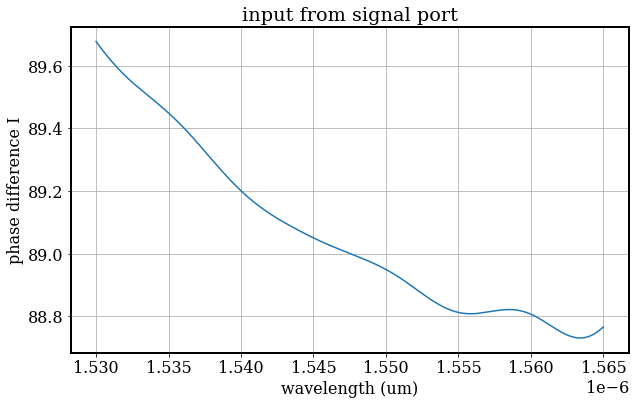

In [166]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
angle_2 = inter.getresult('ONA_1','input 2/mode 1/angle')
angle_3 = inter.getresult('ONA_1','input 3/mode 1/angle')
theta_2 = angle_2['mode 1 angle (rad)']*180/np.pi
theta_3 = angle_3['mode 1 angle (rad)']*180/np.pi
phase_difference_I_SP = abs(theta_2 - theta_3)
plt.plot(lambd, phase_difference_I_SP)
plt.xlabel('wavelength (um)')
plt.ylabel('phase difference I')
plt.title('input from signal port')
plt.grid(True)

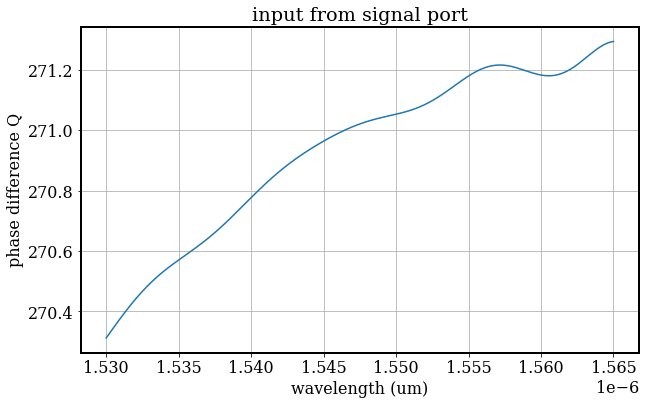

In [167]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
angle_5 = inter.getresult('ONA_1','input 5/mode 1/angle')
angle_6 = inter.getresult('ONA_1','input 6/mode 1/angle')
theta_5 = angle_5['mode 1 angle (rad)']*180/np.pi
theta_6 = angle_6['mode 1 angle (rad)']*180/np.pi
phase_difference_Q_SP = abs(theta_5 - theta_6)
plt.plot(lambd, phase_difference_Q_SP)
plt.xlabel('wavelength (um)')
plt.ylabel('phase difference Q')
plt.title('input from signal port')
plt.grid(True)

/home/moises/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moises/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moises/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moises/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


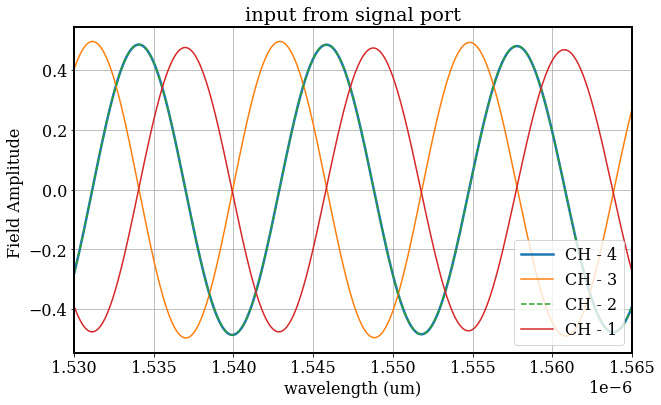

In [168]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(lambd, R2['mode 1 transmission'], label = 'CH - 4', linewidth = 2.5)
plt.plot(lambd, R3['mode 1 transmission'], label = 'CH - 3')
plt.plot(lambd, R5['mode 1 transmission'],'--', label = 'CH - 2')
plt.plot(lambd, R6['mode 1 transmission'], label = 'CH - 1')
plt.xlim([1530e-9, 1565e-9])
plt.xlabel('wavelength (um)')
plt.ylabel('Field Amplitude ')
plt.title('input from signal port')
plt.legend(loc = 'lower right')
plt.grid(True)

# input from LO

In [182]:
R1_LO = inter.getresult('ONA_1','input 1/mode 1/transmission')
R2_LO = inter.getresult('ONA_1','input 2/mode 1/transmission')
R3_LO = inter.getresult('ONA_1','input 3/mode 1/transmission')
R4_LO = inter.getresult('ONA_1','input 4/mode 1/transmission')
R5_LO = inter.getresult('ONA_1','input 5/mode 1/transmission')
R6_LO = inter.getresult('ONA_1','input 6/mode 1/transmission')
T1_LO = np.abs(R1_LO['mode 1 transmission'])**2
T2_LO = np.abs(R2_LO['mode 1 transmission'])**2
T3_LO = np.abs(R3_LO['mode 1 transmission'])**2
T4_LO = np.abs(R4_LO['mode 1 transmission'])**2
T5_LO = np.abs(R5_LO['mode 1 transmission'])**2
T6_LO = np.abs(R6_LO['mode 1 transmission'])**2
lambd = R2['wavelength']
LOport = -10*np.log10(T1_LO + T2_LO + T3_LO + T4_LO + T5_LO + T6_LO)

Text(0.5, 1.0, 'input from LO port')

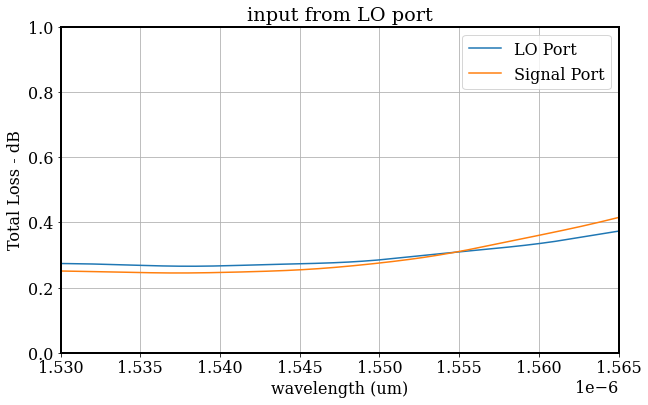

In [192]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(lambd, LOport, label = 'LO Port')
plt.plot(lambd, signalport, label ='Signal Port')
plt.grid(True)
plt.ylim([0, 1])
plt.xlim([1530e-9, 1565e-9])
plt.xlabel('wavelength (um)')
plt.ylabel('Total Loss - dB')
plt.legend(loc = 'upper right')
plt.title('input from LO port')

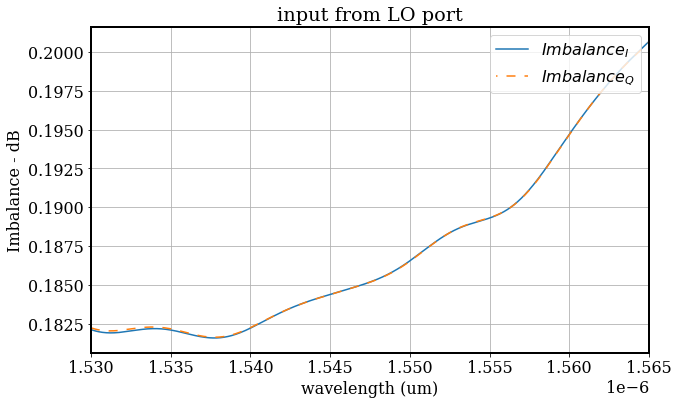

In [197]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
imbalance_I_lo = abs(10*np.log10(T2_LO) - 10*np.log10(T1_LO))
imbalance_Q_lo = abs(10*np.log10(T6_LO) - 10*np.log10(T5_LO))
plt.plot(lambd, imbalance_I_lo, label = '$Imbalance_I$')
plt.plot(lambd, imbalance_Q_lo,linestyle = (5,(6,6)), label = '$Imbalance_Q$')
plt.xlim([1530e-9, 1565e-9])
plt.xlabel('wavelength (um)')
plt.ylabel('Imbalance - dB')
plt.title('input from LO port')
plt.grid(True)
plt.legend(loc = 'upper right')

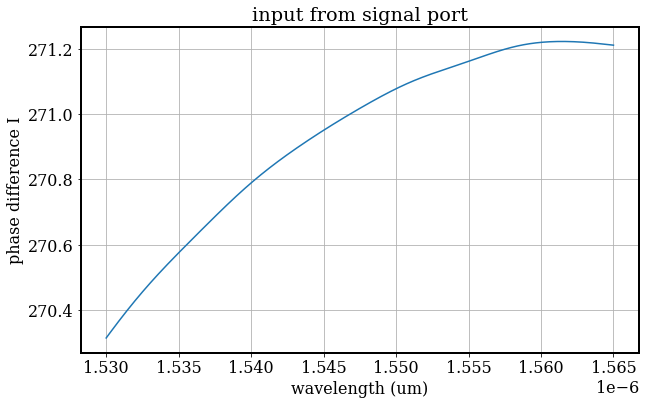

In [208]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
angle_2_lo = inter.getresult('ONA_1','input 1/mode 1/angle')
angle_3_lo = inter.getresult('ONA_1','input 2/mode 1/angle')
theta_2_lo = angle_2_lo['mode 1 angle (rad)']*180/np.pi
theta_3_lo = angle_3_lo['mode 1 angle (rad)']*180/np.pi
phase_difference_I_LO = abs(theta_2_lo - theta_3_lo)
plt.plot(lambd, phase_difference_I_LO)
plt.xlabel('wavelength (um)')
plt.ylabel('phase difference I')
plt.title('input from signal port')
plt.grid(True)

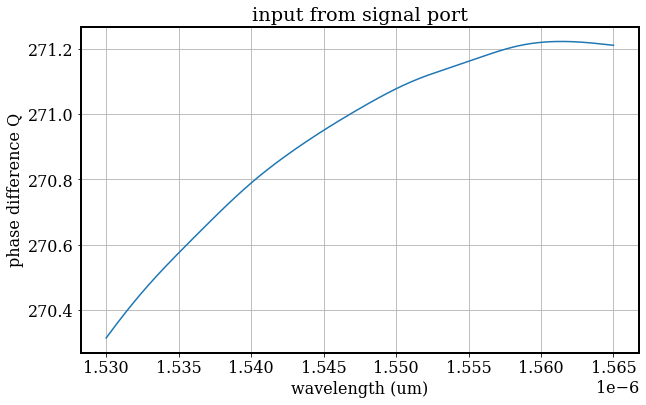

In [210]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
angle_5_lo = inter.getresult('ONA_1','input 5/mode 1/angle')
angle_6_lo = inter.getresult('ONA_1','input 6/mode 1/angle')
theta_5_lo = angle_5_lo['mode 1 angle (rad)']*180/np.pi
theta_6_lo = angle_6_lo['mode 1 angle (rad)']*180/np.pi
phase_difference_Q_LO = abs(theta_5_lo - theta_6_lo)
plt.plot(lambd, phase_difference_Q_LO)
plt.xlabel('wavelength (um)')
plt.ylabel('phase difference Q')
plt.title('input from signal port')
plt.grid(True)

/home/moises/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moises/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moises/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/moises/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


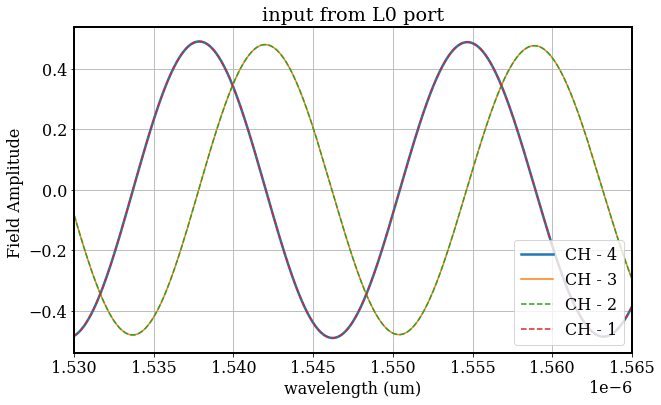

In [213]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(lambd, R2_LO['mode 1 transmission'], label = 'CH - 4', linewidth = 2.5)
plt.plot(lambd, R1_LO['mode 1 transmission'], label = 'CH - 3')
plt.plot(lambd, R5_LO['mode 1 transmission'],'--', label = 'CH - 2')
plt.plot(lambd, R6_LO['mode 1 transmission'],'--' ,label = 'CH - 1')
plt.xlim([1530e-9, 1565e-9])
plt.xlabel('wavelength (um)')
plt.ylabel('Field Amplitude ')
plt.title('input from L0 port')
plt.legend(loc = 'lower right')
plt.grid(True)

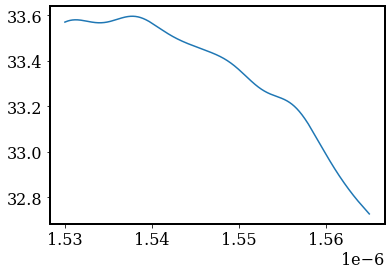

In [224]:
cmrr = -(20*np.log10(abs(T2_LO - T1_LO)) - 20*np.log10(abs(T2_LO + T1_LO)))
plt.plot(lambd, cmrr)

## FDTD

# input from signal port

In [3]:
fdtd = lumapi.FDTD(filename= 'HYBRID.fsp')

In [144]:
eField = np.squeeze(fdtd.getelectric("monitor"))

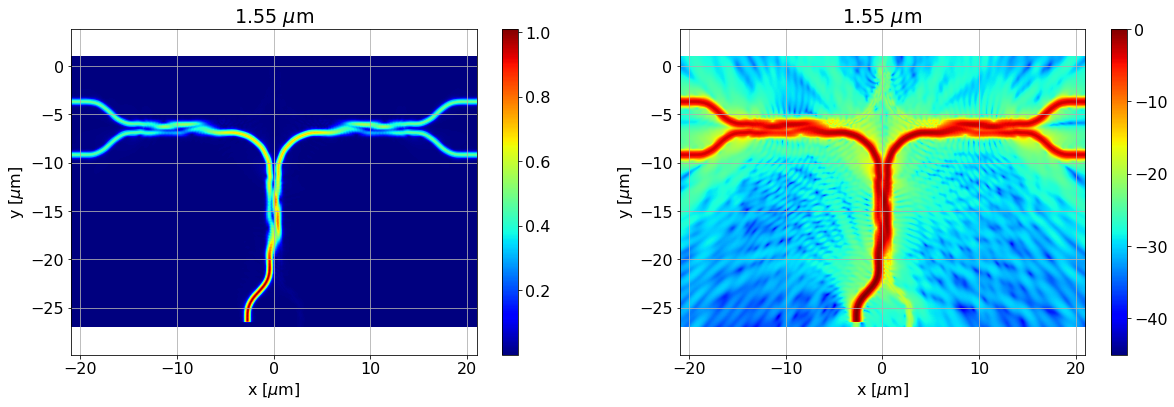

In [21]:
indxLambda = 6
x_efielf = fdtd.getdata("monitor", "x")
y_efielf = fdtd.getdata("monitor", "y")
lmbd = nu2lambda(fdtd.getdata("monitor", "f"))
xmin = 1e6*np.min(x_efielf);
xmax = 1e6*np.max(x_efielf);
ymin = 1e6*np.min(y_efielf);
ymax = 1e6*np.max(y_efielf);

fig1, axs1 = plt.subplots(1,2,figsize=(20,6))
im1 = axs1[0].imshow(np.rot90(np.sqrt(eField[:,:,indxLambda])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im1, ax=axs1[0])
axs1[0].set_xlabel(r'x [$\mu$m]')
axs1[0].set_ylabel(r'y [$\mu$m]')
axs1[0].set_title(r'%4.2f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[0].grid(True)
axs1[0].axis('equal')

im2 = axs1[1].imshow(10*np.log10(np.rot90(np.sqrt(eField[:,:,indxLambda]))), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im2, ax=axs1[1])
axs1[1].set_xlabel(r'x [$\mu$m]')
axs1[1].set_ylabel(r'y [$\mu$m]')
axs1[1].set_title(r'%4.2f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[1].grid(True)
axs1[1].axis('equal')

fig1.tight_layout
plt.rcParams.update({'font.size': 16})

In [129]:
Signal1 = fdtd.getresult('FDTD::ports::Signal1','T')
Signal2 = fdtd.getresult('FDTD::ports::Signal2','T')
LO = fdtd.getresult('FDTD::ports::LO','T')
Q_plus = fdtd.getresult('FDTD::ports::Q+','T')
Q_minus = fdtd.getresult('FDTD::ports::Q-','T')
I_plus = fdtd.getresult('FDTD::ports::I+','T')
I_minus = fdtd.getresult('FDTD::ports::I-','T')
QP = -Q_plus['T']
QN = -Q_minus['T']
IP = I_plus['T']
IN = I_minus['T']
QP_S = fdtd.getresult('FDTD::ports::Q+','S')
QN_S = fdtd.getresult('FDTD::ports::Q-','S')
IP_S = fdtd.getresult('FDTD::ports::I+','S')
IN_S = fdtd.getresult('FDTD::ports::I-','S')
phase_QP = fdtd.angle(QP_S['S'])
phase_QN = fdtd.angle(QN_S['S'])
phase_IP = fdtd.angle(IP_S['S'])
phase_IN = fdtd.angle(IN_S['S'])
angle_QP = fdtd.unwrap(phase_QP)*180/(np.pi)
angle_QN = fdtd.unwrap(phase_QN)*180/(np.pi)
angle_IP = fdtd.unwrap(phase_IP)*180/(np.pi)
angle_IN = fdtd.unwrap(phase_IN)*180/(np.pi)

In [83]:
Imbalance_I_Signal_port = 10*np.log10(I_plus['T']) - 10*np.log10(I_minus['T'])
Imbalance_Q_Signal_port = 10*np.log10(-Q_plus['T']) - 10*np.log10(-Q_minus['T'])
wavelength = Q_plus['lambda']

Text(0.5, 1.0, 'Input from Signal Port')

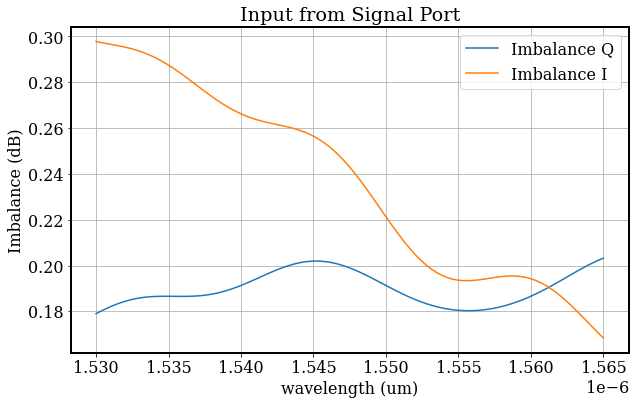

In [107]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, abs(Imbalance_Q_Signal_port), label = 'Imbalance Q')
plt.plot(wavelength, abs(Imbalance_I_Signal_port), label = 'Imbalance I')
plt.xlabel('wavelength (um)')
plt.ylabel('Imbalance (dB)')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.title('Input from Signal Port')

Text(0.5, 1.0, 'Input from Signal Port')

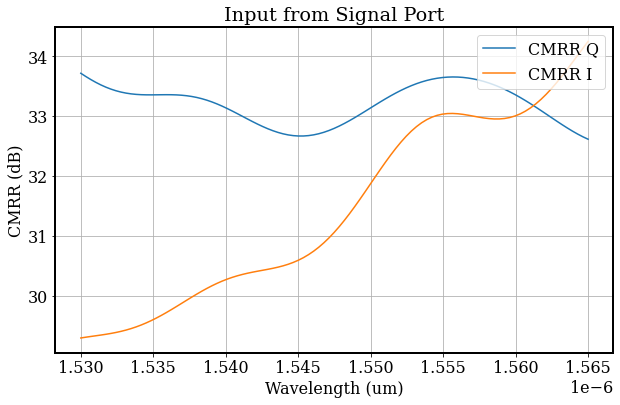

In [108]:
cmrr_q_signal_port = 20*np.log10(abs(Q_plus['T']-Q_minus['T'])) - 20*np.log10(abs(Q_plus['T']+Q_minus['T']))
cmrr_i_signal_port = 20*np.log10(abs(I_plus['T']-I_minus['T'])) - 20*np.log10(abs(I_plus['T']+I_minus['T']))
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, -cmrr_q_signal_port, label = 'CMRR Q')
plt.plot(wavelength, -cmrr_i_signal_port, label = 'CMRR I')
plt.xlabel('Wavelength (um)')
plt.ylabel('CMRR (dB)')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.title('Input from Signal Port')

Text(0.5, 1.0, 'Input from Signal Port')

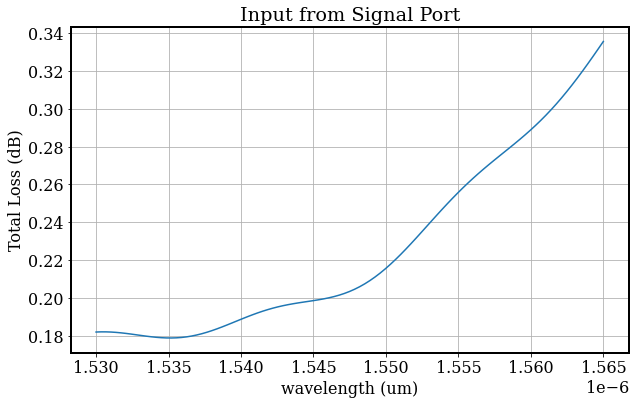

In [124]:
Total_loss_sp = 10*np.log10(Signal1['T']) - 10*np.log10(QP + QN + IP + IN + LO['T'] + Signal2['T'])
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, Total_loss_sp)
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('Total Loss (dB)')
#plt.ylim([0, 1])
plt.title('Input from Signal Port')

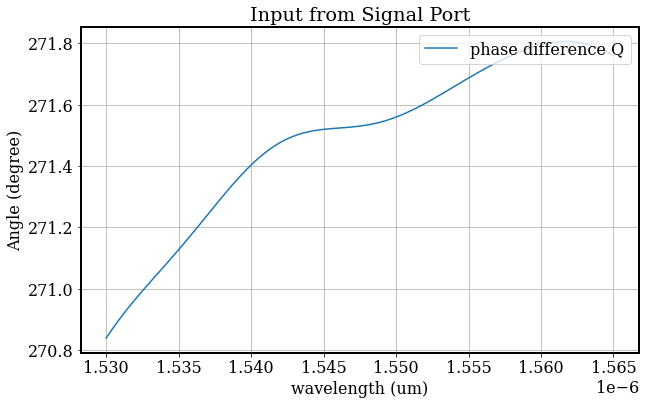

In [140]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, abs(angle_QP - angle_QN), label = 'phase difference Q')
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('Angle (degree)')
plt.title('Input from Signal Port')
plt.legend(loc = 'upper right')

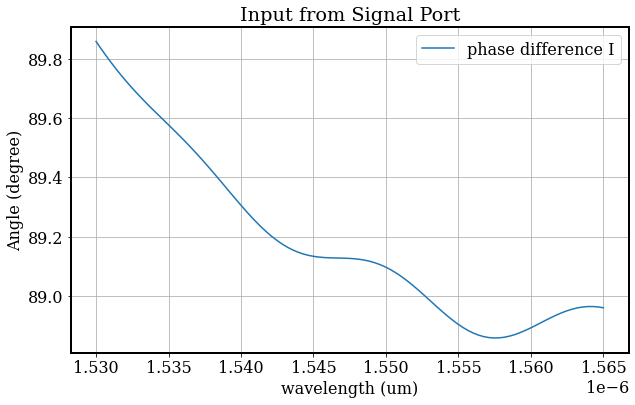

In [142]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, abs(angle_IP - angle_IN), label = 'phase difference I')
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('Angle (degree)')
plt.title('Input from Signal Port')
plt.legend(loc = 'upper right')

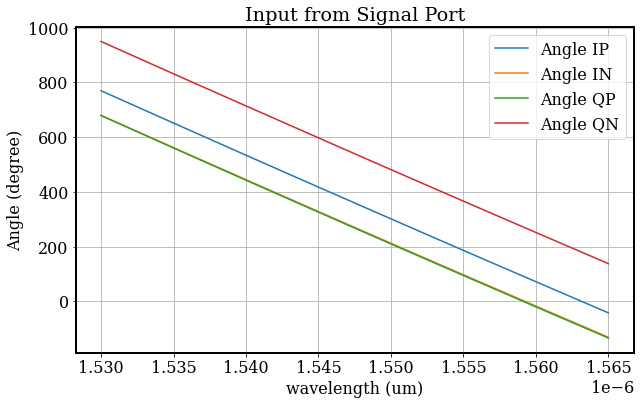

In [170]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, angle_IP, label = 'Angle IP')
plt.plot(wavelength, angle_IN, label = 'Angle IN')
plt.plot(wavelength, angle_QP, label = 'Angle QP')
plt.plot(wavelength, angle_QN, label = 'Angle QN')
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('Angle (degree)')
plt.title('Input from Signal Port')
plt.legend(loc = 'upper right')

#Input from LO Port

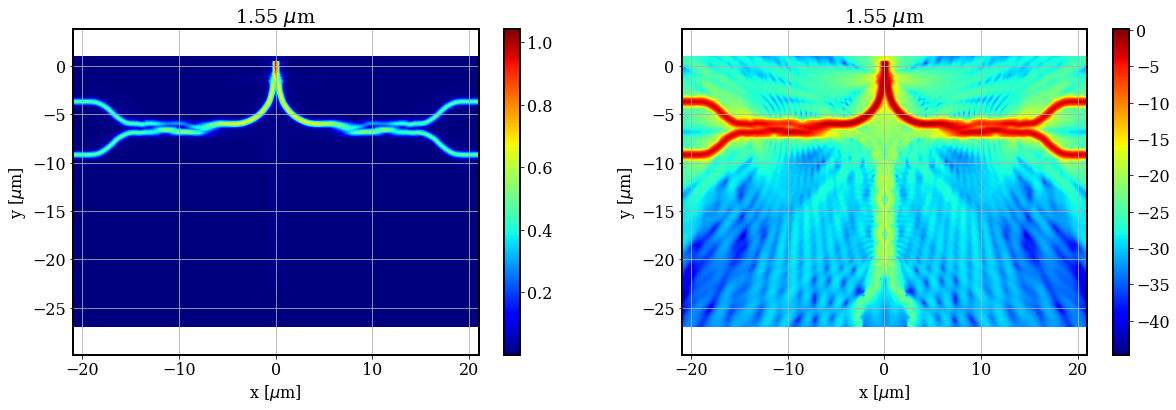

In [145]:
indxLambda = 6
x_efielf = fdtd.getdata("monitor", "x")
y_efielf = fdtd.getdata("monitor", "y")
lmbd = nu2lambda(fdtd.getdata("monitor", "f"))
xmin = 1e6*np.min(x_efielf);
xmax = 1e6*np.max(x_efielf);
ymin = 1e6*np.min(y_efielf);
ymax = 1e6*np.max(y_efielf);

fig1, axs1 = plt.subplots(1,2,figsize=(20,6))
im1 = axs1[0].imshow(np.rot90(np.sqrt(eField[:,:,indxLambda])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im1, ax=axs1[0])
axs1[0].set_xlabel(r'x [$\mu$m]')
axs1[0].set_ylabel(r'y [$\mu$m]')
axs1[0].set_title(r'%4.2f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[0].grid(True)
axs1[0].axis('equal')

im2 = axs1[1].imshow(10*np.log10(np.rot90(np.sqrt(eField[:,:,indxLambda]))), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im2, ax=axs1[1])
axs1[1].set_xlabel(r'x [$\mu$m]')
axs1[1].set_ylabel(r'y [$\mu$m]')
axs1[1].set_title(r'%4.2f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[1].grid(True)
axs1[1].axis('equal')

fig1.tight_layout
plt.rcParams.update({'font.size': 16})

In [151]:
Signal1_LO = fdtd.getresult('FDTD::ports::Signal1','T')
Signal2_LO = fdtd.getresult('FDTD::ports::Signal2','T')
LO_LO = fdtd.getresult('FDTD::ports::LO','T')
Q_plus_LO = fdtd.getresult('FDTD::ports::Q+','T')
Q_minus_LO = fdtd.getresult('FDTD::ports::Q-','T')
I_plus_LO = fdtd.getresult('FDTD::ports::I+','T')
I_minus_LO = fdtd.getresult('FDTD::ports::I-','T')
QP_LO = -Q_plus_LO['T']
QN_LO = -Q_minus_LO['T']
IP_LO = I_plus_LO['T']
IN_LO = I_minus_LO['T']
QP_S_LO = fdtd.getresult('FDTD::ports::Q+','S')
QN_S_LO = fdtd.getresult('FDTD::ports::Q-','S')
IP_S_LO = fdtd.getresult('FDTD::ports::I+','S')
IN_S_LO = fdtd.getresult('FDTD::ports::I-','S')
phase_QP_LO = fdtd.angle(QP_S_LO['S'])
phase_QN_LO = fdtd.angle(QN_S_LO['S'])
phase_IP_LO = fdtd.angle(IP_S_LO['S'])
phase_IN_LO = fdtd.angle(IN_S_LO['S'])
angle_QP_LO = fdtd.unwrap(phase_QP_LO)*180/(np.pi)
angle_QN_LO = fdtd.unwrap(phase_QN_LO)*180/(np.pi)
angle_IP_LO = fdtd.unwrap(phase_IP_LO)*180/(np.pi)
angle_IN_LO = fdtd.unwrap(phase_IN_LO)*180/(np.pi)

In [152]:
Imbalance_I_LO = 10*np.log10(I_plus_LO['T']) - 10*np.log10(I_minus_LO['T'])
Imbalance_Q_LO = 10*np.log10(-Q_plus_LO['T']) - 10*np.log10(-Q_minus_LO['T'])
wavelength = Q_plus['lambda']

Text(0.5, 1.0, 'Input from LO Port')

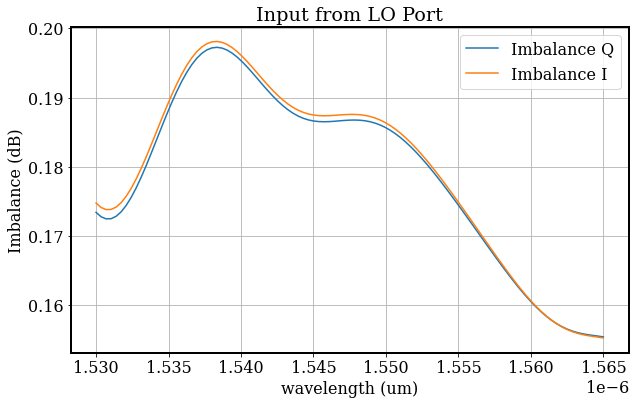

In [153]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, abs(Imbalance_Q_LO), label = 'Imbalance Q')
plt.plot(wavelength, abs(Imbalance_I_LO), label = 'Imbalance I')
plt.xlabel('wavelength (um)')
plt.ylabel('Imbalance (dB)')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.title('Input from LO Port')

Text(0.5, 1.0, 'Input from LO Port')

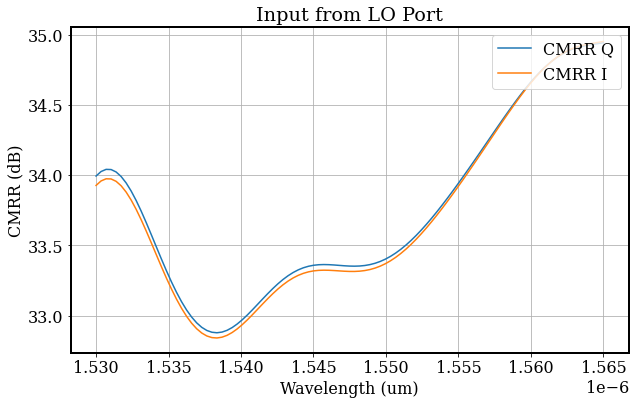

In [154]:
cmrr_q_lo = 20*np.log10(abs(Q_plus_LO['T']-Q_minus_LO['T'])) - 20*np.log10(abs(Q_plus_LO['T']+Q_minus_LO['T']))
cmrr_i_lo = 20*np.log10(abs(I_plus_LO['T']-I_minus_LO['T'])) - 20*np.log10(abs(I_plus_LO['T']+I_minus_LO['T']))
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, -cmrr_q_lo, label = 'CMRR Q')
plt.plot(wavelength, -cmrr_i_lo, label = 'CMRR I')
plt.xlabel('Wavelength (um)')
plt.ylabel('CMRR (dB)')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.title('Input from LO Port')

Text(0.5, 1.0, 'Input from LO Port')

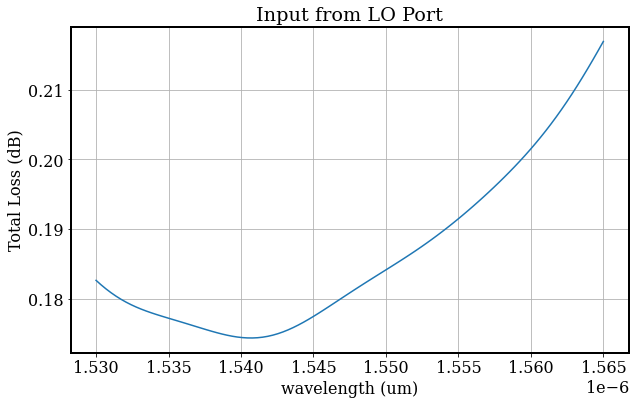

In [165]:
Total_loss_lo = 10*np.log10(-LO_LO['T']) - 10*np.log10(QP_LO + QN_LO + IP_LO + IN_LO - Signal1_LO['T'] - Signal2_LO['T'])
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, Total_loss_lo)
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('Total Loss (dB)')
#plt.ylim([0, 1])
plt.title('Input from LO Port')

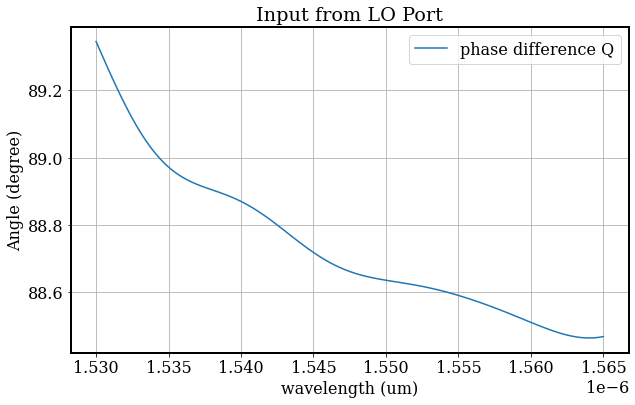

In [166]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, abs(angle_QP_LO - angle_QN_LO), label = 'phase difference Q')
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('Angle (degree)')
plt.title('Input from LO Port')
plt.legend(loc = 'upper right')

Text(0.5, 1.0, 'Input from LO Port')

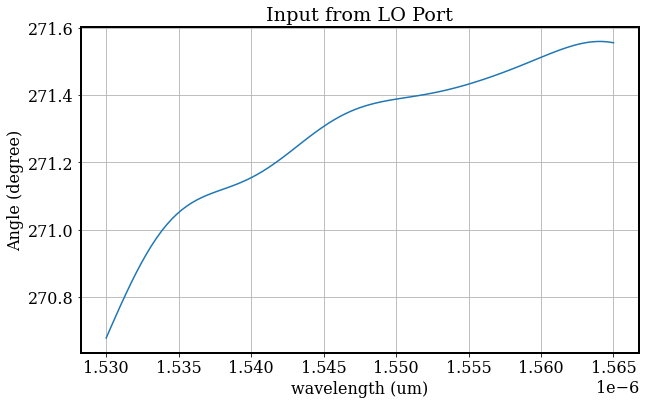

In [172]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, abs(angle_IP_LO - angle_IN_LO), label = 'phase difference Q')
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('Angle (degree)')
plt.title('Input from LO Port')

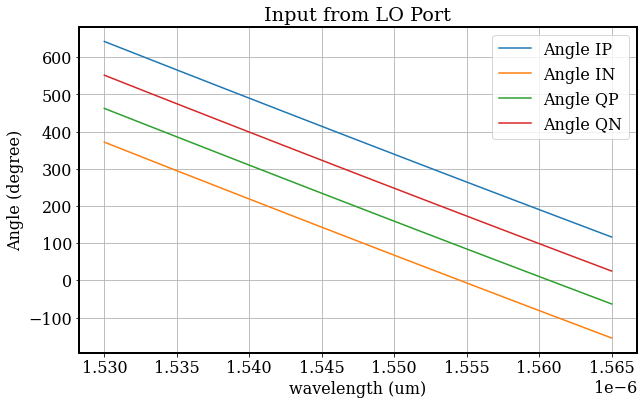

In [171]:
figure = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, angle_IP_LO, label = 'Angle IP')
plt.plot(wavelength, angle_IN_LO, label = 'Angle IN')
plt.plot(wavelength, angle_QP_LO, label = 'Angle QP')
plt.plot(wavelength, angle_QN_LO, label = 'Angle QN')
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('Angle (degree)')
plt.title('Input from LO Port')
plt.legend(loc = 'upper right')

# phase difference Interconnect

In [9]:
Result_IN = inter.getresult('OSC_1', 'signal')
Result_IP = inter.getresult('OSC_2', 'signal')
Result_QN = inter.getresult('OSC_3', 'signal')
Result_QP = inter.getresult('OSC_4', 'signal')